In [49]:
#import  data manipulation libraries
import numpy as np
import pandas as pd
#import data visulization library
import matplotlib.pyplot as plt
import seaborn as sns
#import filter warning librar
import warnings
warnings.filterwarnings("ignore")
#import sckit learn library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error



#customize descriptive stats
from collections import OrderedDict

In [5]:
#import dataset using pandas functiom
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\archive\concrete_data.csv')
df.sample(5)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
607,236.0,0.0,0.0,194.0,0.0,968.0,885.0,28,18.42
910,144.0,136.0,106.0,178.0,7.0,941.0,774.0,28,26.14
415,250.0,0.0,95.7,191.8,5.3,948.9,857.2,3,8.49
694,236.0,157.0,0.0,192.0,0.0,972.6,749.1,28,32.88
500,491.0,26.0,123.0,201.0,3.9,822.0,699.0,28,57.92


In [8]:
#understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
#Descriptive stats
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [56]:
stats=[]
for i in df.columns:
    numerical_stats = OrderedDict({
        "Feature": i,
        "max":df[i].max(),
        "min": df[i].min(),
        "mean":df[i].mean(),
        "median":df[i].median(),
        "standard deviation":df[i].std(),
        "variance":df[i].var(),
        'skewness':df[i].skew(),
        'kurtosis':df[i].kurt(),
        "25":df[i].quantile(.25),
        "75":df[i].quantile(.75),
        "IQR": df[i].quantile(0.75) - df[i].quantile(0.25)  # Interquartile Range
    })
    stats.append(numerical_stats)

# Create a DataFrame from stats
report = pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6,7,8
Feature,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
max,540.0,359.4,200.1,247.0,32.2,1145.0,992.6,365.0,82.6
min,102.0,0.0,0.0,121.8,0.0,801.0,594.0,1.0,2.33
mean,281.167864,73.895825,54.18835,181.567282,6.20466,972.918932,773.580485,45.662136,35.817961
median,272.9,22.0,0.0,185.0,6.4,968.0,779.5,28.0,34.445
standard deviation,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.17598,63.169912,16.705742
variance,10921.58022,7444.124812,4095.616541,456.002651,35.686781,6045.677357,6428.187792,3990.437729,279.081814
skewness,0.509481,0.800717,0.537354,0.074628,0.907203,-0.04022,-0.25301,3.269177,0.416977
kurtosis,-0.520652,-0.508175,-1.328746,0.122082,1.411269,-0.599016,-0.102177,12.168989,-0.313725
25,192.375,0.0,0.0,164.9,0.0,932.0,730.95,7.0,23.71


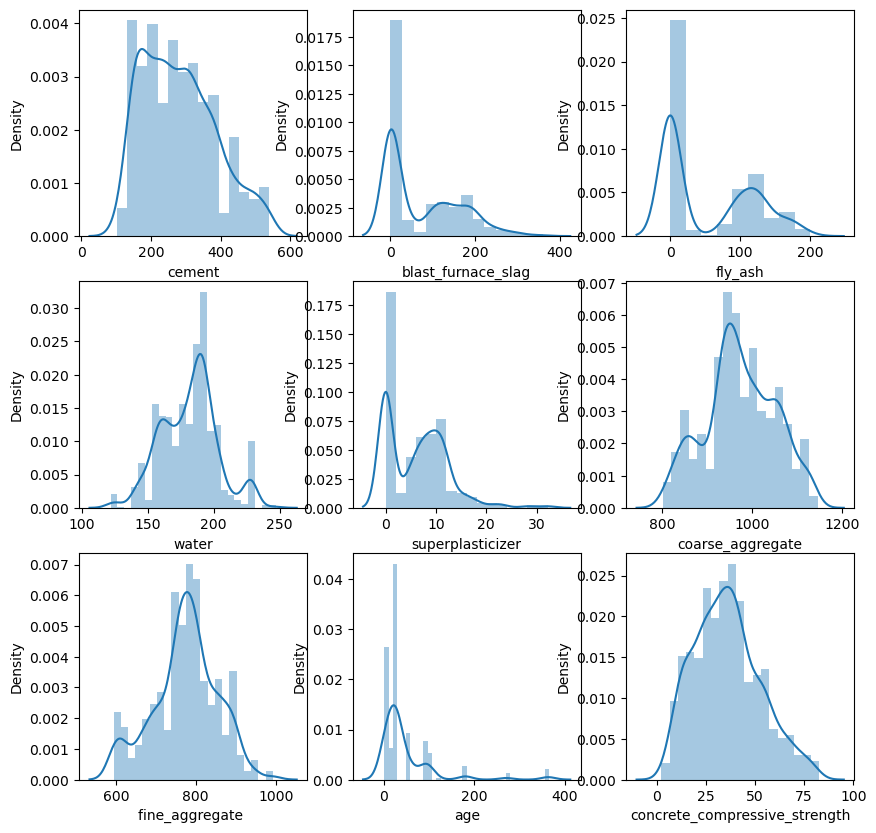

In [27]:
plt.figure(figsize=(10,10))
plot=0
for i in df.columns:
    plot=plot+1
    plt.subplot(3,3,plot)
    sns.distplot(df[i])
plt.show()

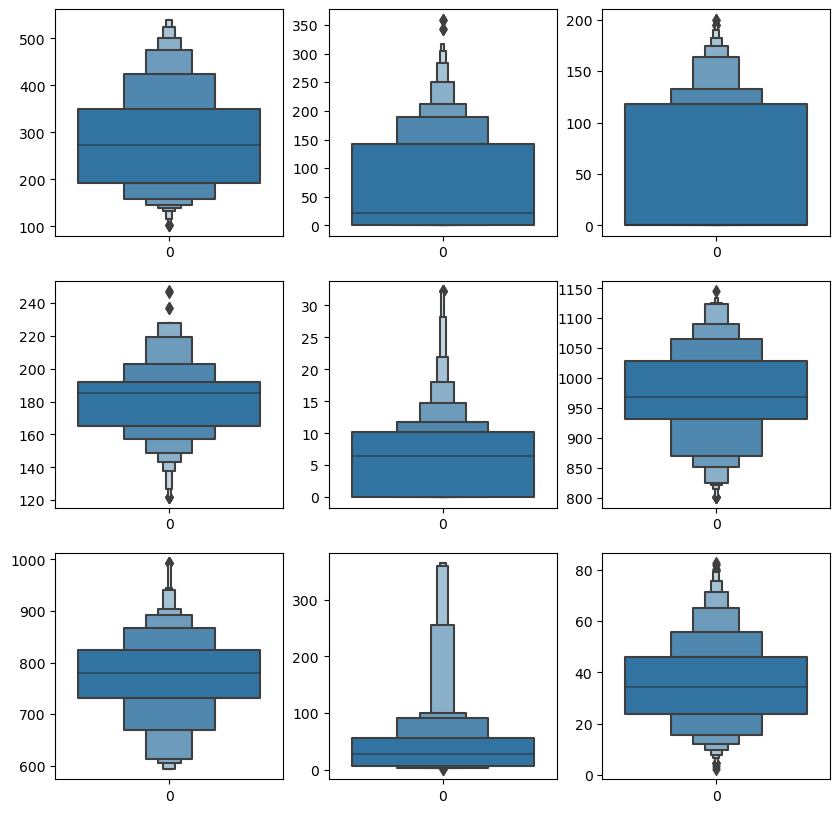

In [29]:
plt.figure(figsize=(10,10))
plot=0
for i in df.columns:
    plot=plot+1
    plt.subplot(3,3,plot)
    sns.boxenplot(df[i])
plt.show()

In [30]:
#checking coloumns name
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [37]:
#split the data into train and split
x=df.drop(columns=["concrete_compressive_strength"],axis=1)
y=df["concrete_compressive_strength"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=21)


In [45]:
#Scaling technique
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [47]:
x_train.max()

1.0

In [48]:
x_train.min()

0.0

In [51]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_train,y_train)#train dataset-0.98
model.score(x_test,y_test)#testdatset-0.90
#train accuracy =test accuracy

0.9021739551097869

In [58]:
sns.displot(y_test,y_pred)
plt.axvline(0,color='red')
plt.show()

TypeError: displot() takes from 0 to 1 positional arguments but 2 were given

In [55]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
model.score(x_train,y_train)#train dataset-0.599
model.score(x_test,y_test)#testdatset-0.66
#train accuracy =test accuracy

0.6610135755875732

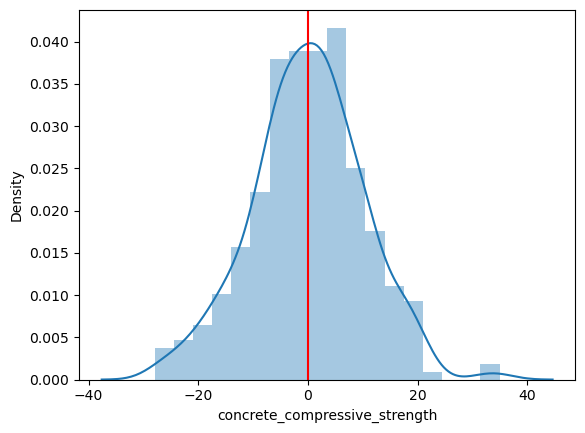

In [61]:
sns.distplot(y_test - y_pred)
plt.axvline(0,color = 'red')
plt.show()
     